# LDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mplot3d
import os
from sklearn.neighbors import KNeighborsClassifier

### Choosing 25 subjects from 68 in the CMU PIE dataset

In [2]:
PIE_subjects = os.listdir("PIE")
selected_subjects = np.random.choice(PIE_subjects, size = 25, replace = False)
train_photos_path = []
test_photos_path  = []
for subject in selected_subjects:
    subject_photos = os.listdir("PIE"+"/"+subject)
    subject_train  = np.random.choice(subject_photos, size = int(0.7*len(subject_photos)), replace=False)
    subject_test   = np.setdiff1d(subject_photos, subject_train)
    for photo in subject_train :
        train_photos_path.append("PIE"+'/'+subject+'/'+photo)
    for photo in subject_test :
        test_photos_path.append("PIE"+'/'+subject+'/'+photo)

train_photos_array =  np.array([plt.imread(photo) for photo in train_photos_path])
test_photos_array =  np.array([plt.imread(photo) for photo in test_photos_path])
print("The selected subjects are :\n", selected_subjects)

The selected subjects are :
 ['24' '31' '41' '67' '13' '59' '8' '34' '12' '43' '5' '30' '33' '11' '56'
 '29' '9' '60' '55' '47' '44' '10' '7' '68' '19']


In [3]:
X_train = train_photos_array
Y_train = np.array([path.split('/')[-2] for path in train_photos_path])
X_test  = test_photos_array
Y_test  = np.array([path.split('/')[-2] for path in test_photos_path])

### reading my selfies

In [4]:
selfies = os.listdir("selfies")
selfies_path = []
for selfie in selfies :
    selfies_path.append("selfies" + '/' + selfie)
train_selfies_path = np.random.choice(selfies_path, size = 7, replace=False)
test_selfies_path  = np.setdiff1d(selfies_path, train_selfies_path)

#train_selfies_array = np.array([plt.imread(selfie) for selfie in train_selfies_name])
#test_selfies_array = np.array([plt.imread(selfie) for selfie in test_selfies_name])

In [5]:
X_train_selfies = np.array([plt.imread(selfie) for selfie in train_selfies_path])
X_test_selfies  = np.array([plt.imread(selfie) for selfie in test_selfies_path])

Y_train_selfies = np.array([69 for i in range(7)])
Y_test_selfies  = np.array([69 for i in range(3)])

In [6]:
_, img_size1, img_size2 = X_train.shape
num_features = img_size1*img_size2

In [7]:
# Add the selfies to X_Train, X_test and Y_train, Y_test
X_train = np.concatenate((X_train, X_train_selfies), axis=0).reshape((len(X_train)+7, num_features))
X_test  = np.concatenate((X_test, X_test_selfies), axis=0).reshape((len(X_test)+3, num_features))
Y_train = np.concatenate((Y_train, Y_train_selfies), axis=0)
Y_test  = np.concatenate((Y_test, Y_test_selfies), axis=0)

In [8]:
# The overall data
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((Y_train, Y_test), axis=0)

### Applying LDA

In [9]:
def LDA(X,y):
    class_labels = np.unique(y)
    n_classes    = class_labels.shape[0]
    mean_X       = np.mean(X, axis=0)
    # initialization of the within between class scatter matrix
    S_W          = np.zeros((num_features, num_features))
    S_B          = np.zeros((num_features, num_features))
    
    for c in class_labels:
        X_c    = X[y == c] # feature vectors corresponding to this class
        mean_c = np.mean(X_c, axis=0)
        # update the within class matrix
        S_W += np.dot((X_c-mean_c).T, X_c-mean_c)
        
        # update the within class matrix
        num_c  = X_c.shape[0]  # number of feature vector of class c
        mean_difference = (mean_c-mean_X).reshape(num_features,1) # important
        S_B += num_c*np.dot(mean_difference, mean_difference.T)
    #
    M = np.dot(np.linalg.inv(S_W), S_B)
    eigen_vals, eigen_vecs = np.linalg.eig(M)
    # find the indexes of the highest eignevalues
    eigen_vals_indexes = np.argsort(abs(eigen_vals))[::-1]
    # sort the eigen values and vectors accordinly
    sorted_eigen_vals      = eigen_vals[eigen_vals_indexes]
    sorted_eigen_vecs      = eigen_vecs[:,eigen_vals_indexes]
    return sorted_eigen_vals, sorted_eigen_vecs  

In [10]:
eigen_vals, eigen_vecs = LDA(X, Y)

### Reducing dimentionality to 2, 3 and 9 

In [11]:
reduced_X_2D = np.dot(X, eigen_vecs[:,:2]).real
reduced_X_3D = np.dot(X, eigen_vecs[:,:3]).real
reduced_X_9D = np.dot(X, eigen_vecs[:,:9]).real

### 2D visualisation

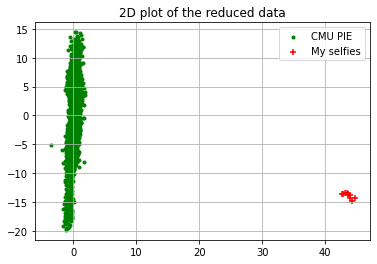

In [12]:
plt.scatter(reduced_X_2D[:len(X_train)-7,0].real, reduced_X_2D[:len(X_train)-7,1].real, marker='.', color = 'g', label="CMU PIE" )
plt.scatter(reduced_X_2D[len(X_train):len(X)-3,0].real, reduced_X_2D[len(X_train):len(X)-3,1].real, marker='.', color = 'g' )
plt.scatter(reduced_X_2D[len(X_train)-7:len(X_train),0].real, reduced_X_2D[len(X_train)-7:len(X_train),1].real, marker='+', color = 'r', label="My selfies" )
plt.scatter(reduced_X_2D[len(X)-3:,0].real, reduced_X_2D[len(X)-3:,1].real, marker='+', color = 'r' )
plt.title("2D plot of the reduced data")
plt.legend()
plt.grid()
plt.show()

### 3D visualisation

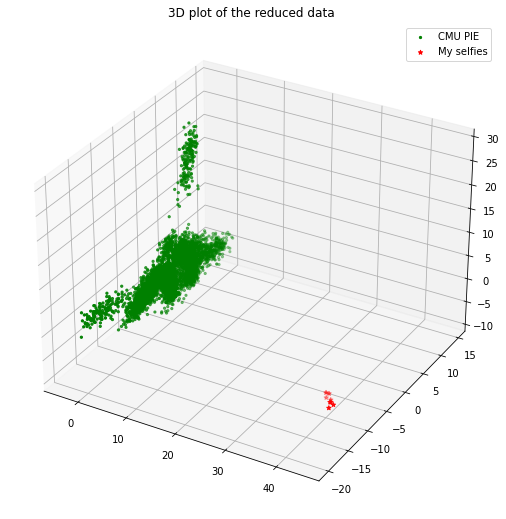

In [13]:
fig = plt.figure(figsize=(9,9))
ax  = fig.add_subplot(projection="3d")
PIE_x     = np.concatenate((reduced_X_3D[:len(X_train)-7,0],reduced_X_3D[len(X_train):len(X)-3,0]),axis=0).real 
PIE_y     = np.concatenate((reduced_X_3D[:len(X_train)-7,1],reduced_X_3D[len(X_train):len(X)-3,1]),axis=0).real
PIE_z     = np.concatenate((reduced_X_3D[:len(X_train)-7,2],reduced_X_3D[len(X_train):len(X)-3,2]),axis=0).real

selfies_x = np.concatenate((reduced_X_3D[len(X_train)-7:len(X_train),0],reduced_X_3D[len(X)-3:,0]),axis=0).real
selfies_y = np.concatenate((reduced_X_3D[len(X_train)-7:len(X_train),1],reduced_X_3D[len(X)-3:,1]),axis=0).real
selfies_z = np.concatenate((reduced_X_3D[len(X_train)-7:len(X_train),2],reduced_X_3D[len(X)-3:,2]),axis=0).real

ax.scatter3D(PIE_x, PIE_y, PIE_z, marker = '.',color = 'g', label="CMU PIE")
ax.scatter3D(selfies_x, selfies_y, selfies_z, marker = '*',color='r', label="My selfies")
ax.set_title("3D plot of the reduced data")
plt.legend()
plt.show()

## Classifying the test images using the nearest neighbor

In [15]:
for d in [2,3,9]:
    print("Dim : ", d)
    # Get the reduced X_train and X_test
    reduced_X_train = np.dot(X_train, eigen_vecs[:,:d]).real
    reduced_X_test = np.dot(X_test, eigen_vecs[:,:d]).real
    
    # Initialise the KNN classifier with K=1
    knn = KNeighborsClassifier(n_neighbors=1)
    # Train the classifier
    knn.fit(reduced_X_train, Y_train)
    # Compute the predicted label of the test data
    Y_pred = knn.predict(reduced_X_test)
    # Compute the test score 
    score_CMU = (np.sum(Y_test[:-3] == Y_pred[:-3]))/(len(Y_test))
    score_selfie = (np.sum(Y_test[-3:] == Y_pred[-3:]))/3
    print("Score of the test set :")
    print("CMU PIE : {} | Selfies : {}".format(score_CMU, score_selfie))
    
        # Compute the training score 
    train_score = knn.score(reduced_X_train, Y_train)
    print("Score of the training set :")
    print("All data : {}\n".format(train_score))

Dim :  2
Score of the test set :
CMU PIE : 0.2762854950115119 | Selfies : 1.0
Score of the training set :
All data : 1.0

Dim :  3
Score of the test set :
CMU PIE : 0.4681504221028396 | Selfies : 1.0
Score of the training set :
All data : 1.0

Dim :  9
Score of the test set :
CMU PIE : 0.9792785878741366 | Selfies : 1.0
Score of the training set :
All data : 1.0

